# Procesamiento de Imágenes
# Trabajo Práctico Nº2

## 1. Histogramas

In [1]:
import cv2
from PIL import Image
import os   
import numpy as np
import matplotlib.pyplot as plt

#### 1. Calcular el histograma de una imagen en escala de grises y de cada canal de una imagen a color. Visualizar los histogramas usando Matplotlib

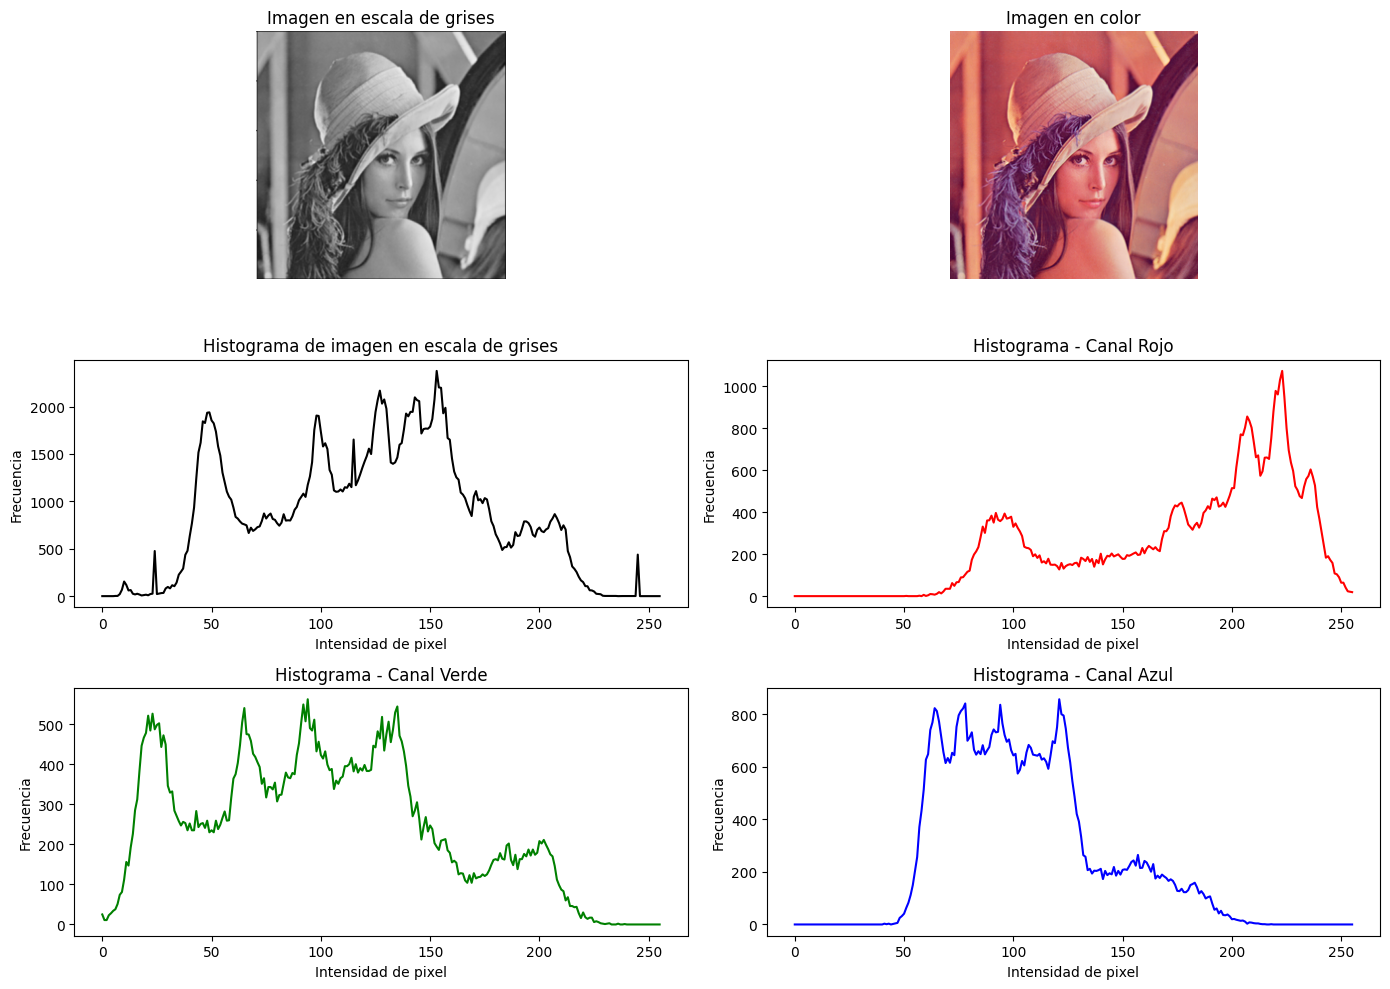

In [12]:
color_image_path = '../Images/Lenna.png'
bg_image_path = '../Images/Lenna_grey.png'

color_image = cv2.imread(color_image_path)
color_image_rgb = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)

bg_image = cv2.imread(bg_image_path, cv2.IMREAD_GRAYSCALE)

hist_gray = cv2.calcHist([bg_image], [0], None, [256], [0, 256])
hist_r = cv2.calcHist([color_image], [2], None, [256], [0, 256])  
hist_g = cv2.calcHist([color_image], [1], None, [256], [0, 256])  
hist_b = cv2.calcHist([color_image], [0], None, [256], [0, 256])  

plt.figure(figsize=(14, 10))

plt.subplot(3,2, 1)
plt.imshow(bg_image, cmap='gray')
plt.title('Imagen en escala de grises')
plt.axis('off')

plt.subplot(3,2, 2)
plt.imshow(color_image_rgb)
plt.title('Imagen en color')
plt.axis('off')


plt.subplot(3,2, 3)
plt.plot(hist_gray, color='black',)
plt.title('Histograma de imagen en escala de grises')
plt.xlabel('Intensidad de pixel')
plt.ylabel('Frecuencia')

plt.subplot(3,2,4)
plt.plot(hist_r, color='red', label='Rojo')
plt.title('Histograma - Canal Rojo')
plt.xlabel('Intensidad de pixel')
plt.ylabel('Frecuencia')

plt.subplot(3,2,5)
plt.plot(hist_g, color='green', label='Verde')
plt.title('Histograma - Canal Verde')
plt.xlabel('Intensidad de pixel')
plt.ylabel('Frecuencia')

plt.subplot(3,2,6)
plt.plot(hist_b, color='blue', label='Azul')
plt.title('Histograma - Canal Azul')
plt.xlabel('Intensidad de pixel')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()
    



#### 2. Convertir una imagen de color a escala de grises y HSV. Extraer cada canal de color por separado y mostrarlo con histograma.

/tmp/ipykernel_10010/3592229253.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipykernel_10010/3592229253.py:48: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


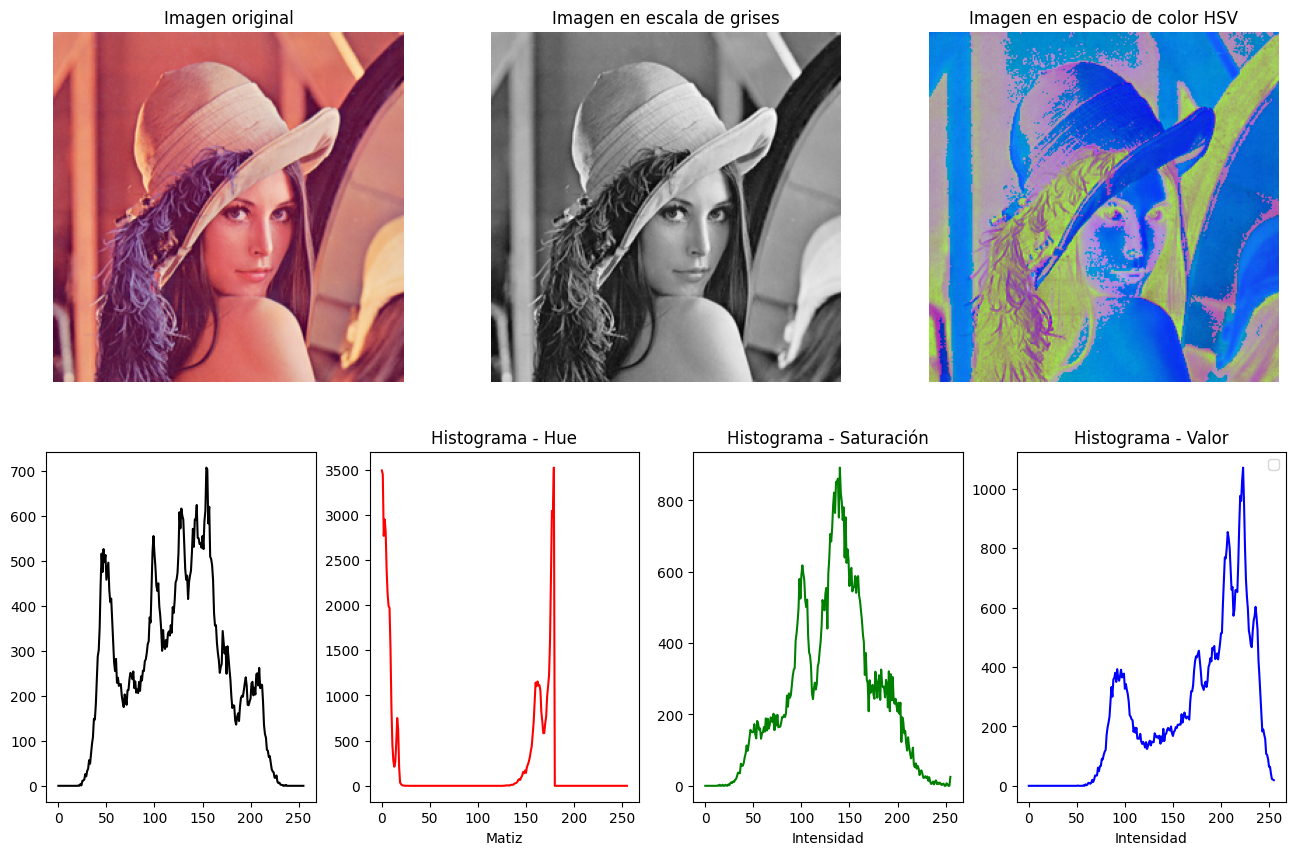

In [ ]:
image_path = '../Images/Lenna.png'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)


# Get histograms
hist_gray = cv2.calcHist([image_gray], [0], None, [256], [0, 256])
hist_hue = cv2.calcHist([image_hsv], [0], None, [256], [0, 256])
hist_saturation = cv2.calcHist([image_hsv], [1], None, [256], [0, 256])
hist_value = cv2.calcHist([image_hsv], [2], None, [256], [0, 256])

# Plot histograms
plt.figure(figsize=(16, 10))

plt.subplot(2, 3, 1)
plt.imshow(image_rgb)
plt.title('Imagen original')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(image_gray, cmap='gray')
plt.title('Imagen en escala de grises')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(image_hsv)
plt.title('Imagen en espacio de color HSV')
plt.axis('off')

plt.subplot(2, 4, 5)
plt.plot(hist_gray, color='black', label='Escala de grises')
plt.title('Histograma - Grises')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')

plt.subplot(2, 4, 6)
plt.plot(hist_hue, color='red')
plt.title('Histograma - Hue')
plt.xlabel('Matiz')

plt.subplot(2, 4, 7)
plt.plot(hist_saturation, color='green')
plt.title('Histograma - Saturación')
plt.xlabel('Intensidad')

plt.subplot(2, 4, 8)
plt.plot(hist_value, color='blue')
plt.title('Histograma - Valor')
plt.xlabel('Intensidad')

plt.legend()
plt.tight_layout()
plt.show()

#### 3. Cargar una imagen en escala de grises y a color. Posteriormente, modificar un conjunto de píxeles en una región específica (por ejemplo, convertir una zona a negro). Calcular el negativo de una imagen invirtiendo los valores de píxeles.

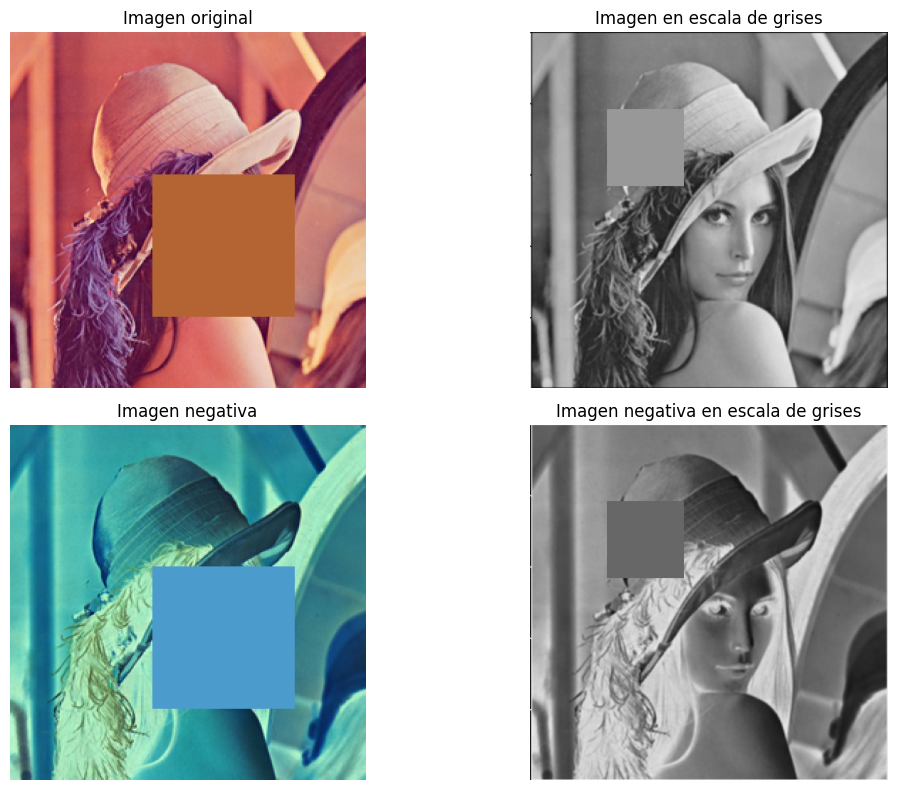

In [17]:
image_path = '../Images/Lenna.png'
image_bw_path = '../Images/Lenna_grey.png'

image = cv2.imread(image_path)
image_bw = cv2.imread(image_bw_path, cv2.IMREAD_GRAYSCALE)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


area = 100, 200, 100, 200
target_intensity_bw = 148
target_intensity_color = 180,100,50

image_bw[area[0]:area[1], area[2]:area[3]] = target_intensity_bw
image_rgb[area[0]:area[1], area[2]:area[3]] = target_intensity_color

negative_bw = 255 - image_bw
negative_rgb = 255 - image_rgb

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(image_rgb)
plt.title('Imagen original')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(image_bw, cmap='gray')
plt.title('Imagen en escala de grises')
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(negative_rgb)
plt.title('Imagen negativa')
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(negative_bw, cmap='gray')
plt.title('Imagen negativa en escala de grises')
plt.axis('off')
plt.tight_layout()
plt.show()




#### 4. Implementar una transformación lineal de la forma I’=α I+β donde α es el factor de contraste y β es el ajuste de brillo.

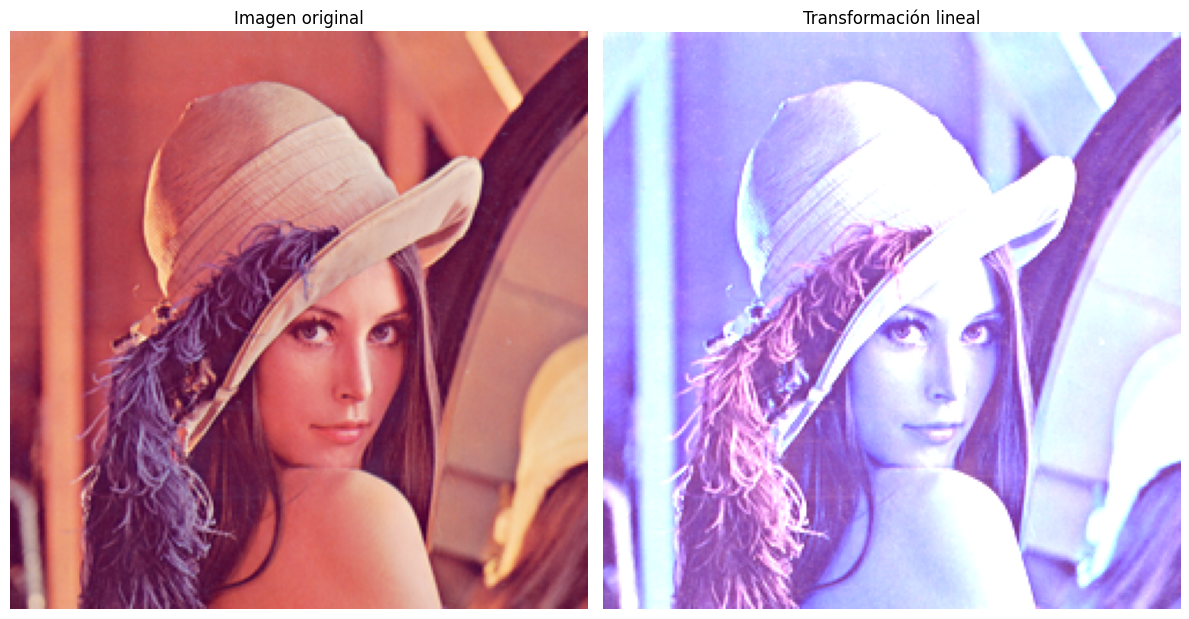

In [19]:
# Usando opencv
def apply_linear_transformation(image, contrast, brightness):
    return cv2.convertScaleAbs(image, alpha=contrast, beta=brightness)
    
# Desde cero
def apply_linear_transformation_manual(image, contrast, brightness):
    height, width = image.shape[:2]
    channels = 1 if len(image.shape) == 2 else image.shape[2]

    result = image.copy()

    for y in range(height):
        for x in range(width):
            if channels == 1:
                val = contrast * image[y, x] + brightness
                result[y, x] = max(0, min(255, int(round(val))))

            else:
                for c in range(channels):
                    val = contrast * image[y, x, c] + brightness
                    result[y, x, c] = max(0, min(255, int(round(val))))
    return result


image_path = '../Images/Lenna.png'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

alpha, beta = 1.5, 50

image_contrast_opencv = apply_linear_transformation(image, alpha, beta)
image_contrast_manual = apply_linear_transformation_manual(image, alpha, beta)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Imagen original')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(image_contrast_manual)
plt.title('Transformación lineal')
plt.axis('off')
plt.tight_layout()
plt.show()


#### 5. Cargar dos imágenes diferentes (por ejemplo, fotos tomadas en diferentes condiciones de iluminacián). Calcular sus histogramas y compararlos usando diferentes métricas (correlación, chi-cuadrado, intersección).

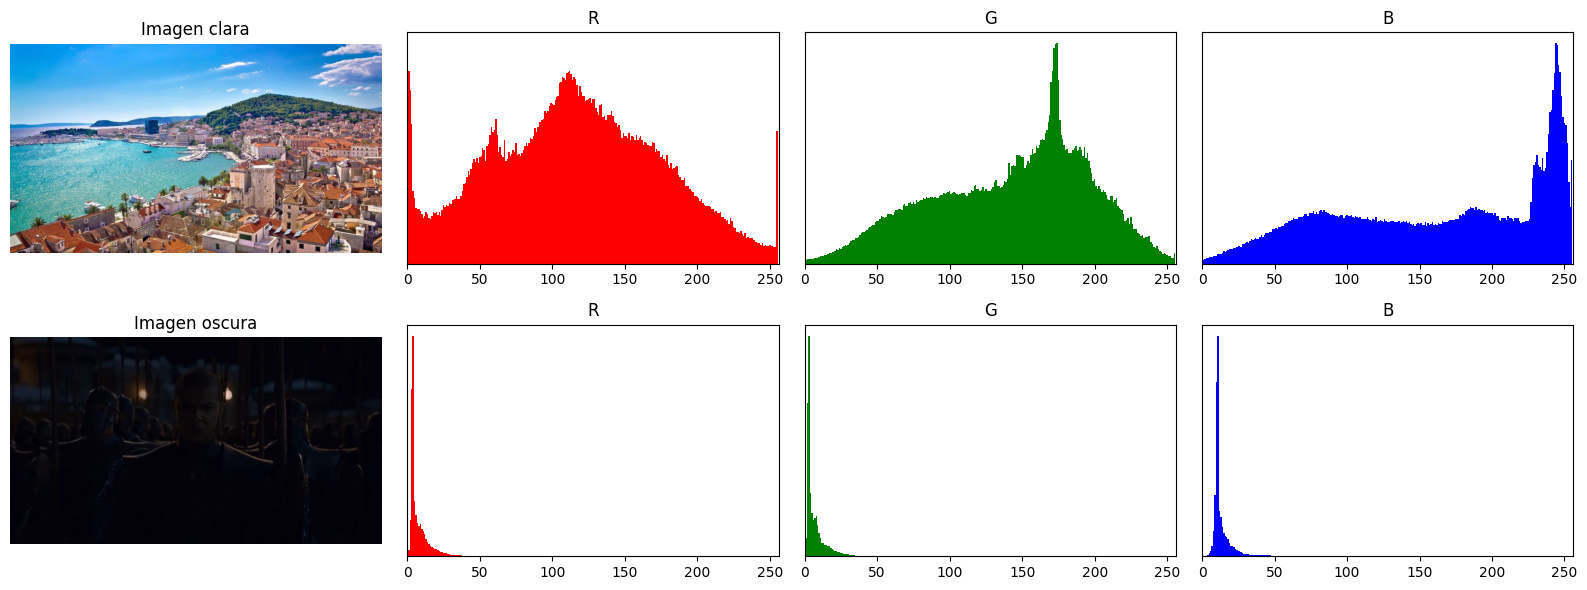

In [31]:
def plot_histogram(ax, hist, color, title):
    ax.bar(np.arange(256), hist, color=color, width=1)
    ax.set_title(title)
    ax.set_xlim([0, 256])
    ax.set_yticks([])

image_paths = ['./part1/5/got-light.jpg', './part1/5/got-dark.jpg']
image_titles = ['Imagen clara', 'Imagen oscura']
channels = ['R', 'G', 'B']
colors = ['red', 'green', 'blue']

histograms = [[] for _ in range(len(image_paths))]

img_light = cv2.imread(image_paths[0])
img_dark = cv2.imread(image_paths[1])
img_light_rgb = cv2.cvtColor(img_light, cv2.COLOR_BGR2RGB)
img_dark_rgb = cv2.cvtColor(img_dark, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(16, 6))
for i, path in enumerate(image_paths):
    img_bgr = cv2.imread(path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # Calcular histogramas individuales (en orden BGR)
    hist_b = cv2.calcHist([img_bgr], [0], None, [256], [0, 256]).flatten()
    hist_g = cv2.calcHist([img_bgr], [1], None, [256], [0, 256]).flatten()
    hist_r = cv2.calcHist([img_bgr], [2], None, [256], [0, 256]).flatten()
    
    histograms[i] =[hist_r, hist_g, hist_b]

    # Mostrar imagen
    plt.subplot(2, 4, i * 4 + 1)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(image_titles[i])

    # Mostrar histogramas
    for j in range(3):
        ax = plt.subplot(2, 4, i * 4 + j + 2)
        plot_histogram(ax, histograms[i][j], colors[j], f'{channels[j]}')

plt.tight_layout()
plt.show()

{'Correlación': {'R': -0.060007109582916454, 'G': -0.24980340161455983, 'B': -0.19318527104370362}, 'Chi-cuadrado': {'R': 5149883.614845046, 'G': 58459133.8502214, 'B': 25973538.432971857}, 'Intersección': {'R': 45142.0, 'G': 15238.0, 'B': 25305.0}, 'Bhattacharyya': {'R': 0.824516171077034, 'G': 0.91732273008164, 'B': 0.8965930202695029}}


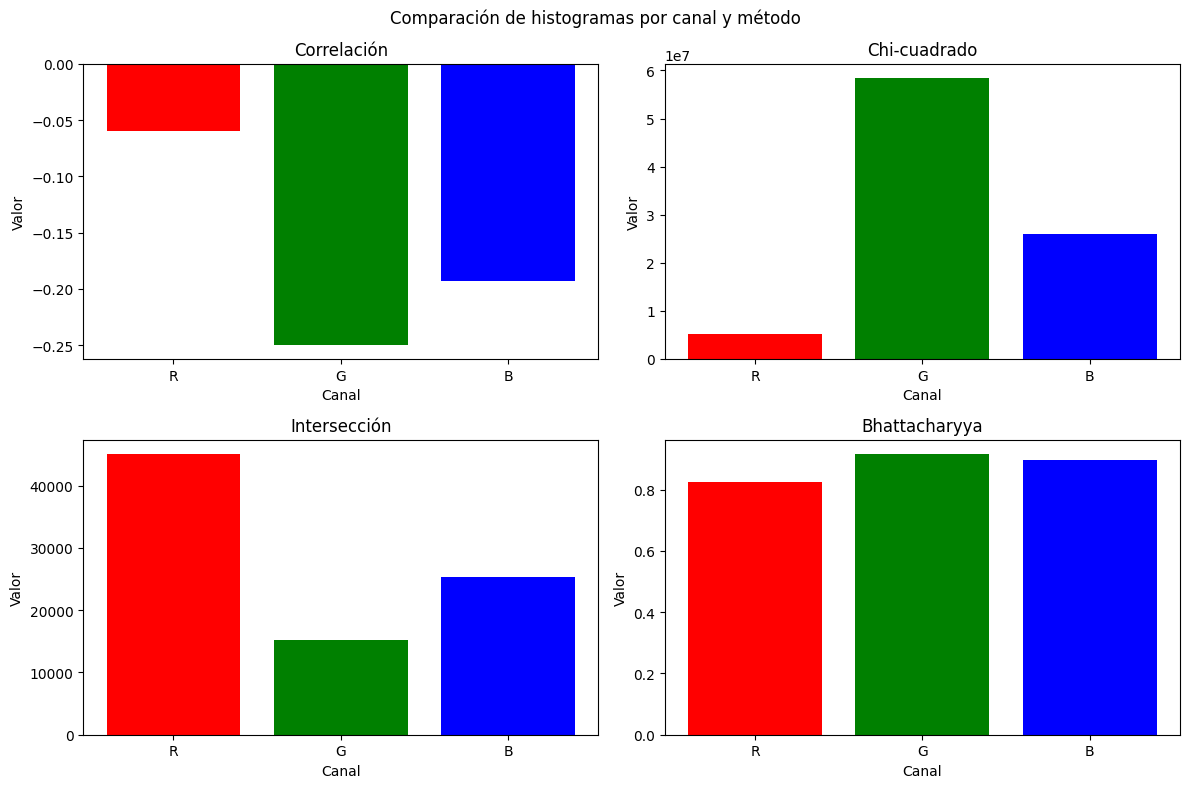

In [45]:
## Comparacion de histogramas
def compare_histograms(hist1, hist2, method):
    return cv2.compareHist(hist1, hist2, method)

methods = {
    'Correlación': cv2.HISTCMP_CORREL,
    'Chi-cuadrado': cv2.HISTCMP_CHISQR,
    'Intersección': cv2.HISTCMP_INTERSECT,
    'Bhattacharyya': cv2.HISTCMP_BHATTACHARYYA,
}

# Para cada metodo, calcular la diferencia entre los histogramas de cada canal
results = {}
for method_name, method in methods.items():
    results[method_name] = {
        'R': compare_histograms(histograms[0][0], histograms[1][0], method),
        'G': compare_histograms(histograms[0][1], histograms[1][1], method),
        'B': compare_histograms(histograms[0][2], histograms[1][2], method)
    }

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

print(results)

for i, (method_name, values) in enumerate(results.items()):
    canales = list(values.keys()) 
    valores = list(values.values())
    colores = ['red', 'green', 'blue']

    axs[i].bar(canales, valores, color=colores)
    axs[i].set_title(method_name)
    axs[i].set_xlabel('Canal')
    axs[i].set_ylabel('Valor')

plt.suptitle('Comparación de histogramas por canal y método')
plt.tight_layout()
plt.show()

    


    

#### 6. Explicar qué diferencias se pueden observar en los histogramas.

Del mismo modo que las imágenes se ven muy distintas a simple vista, sus histogramas son extremadamente diferentes. Principalmente, podemos apreciar que, mientras que la imagen clara tiene una distribución de intensidades que abarca todo el rango (de valores bajos a altos). La imagen oscura concentra prácticamente todos sus valores en las zonas bajas de intensidad en los tres canales de color.

Esto se refleja en las métricas de comparación del ejercicio 5:
- La correlación es baja (menor a cero en los tres canales).
- El chi cuadrado es sumamente alto (en el orden de $10^7$), lo que indica que la diferencia entre ambas imágenes es muy grande.
- La intersección, aunque nominalmente es alta, es baja para este tipo de comparación, ya que porcentualmente no es significativa.
- El método de Bhattacharyya se aleja de cero, lo que indica que la diferencia entre ambas imágenes es muy grande.

## 2. Combinación de imágenes

### 1. Suma de imágenes con ponderación: Cargar dos imágenes del mismo tamaño y combı́nalas con una ponderación especı́fica usando la función cv2.addWeighted().


In [2]:
def load_image(path):
    return Image.open(path)

def get_image_parameters(path):
    image = Image.open(path)
    width, height = image.size
    bit_depth = image.bits
    size = os.path.getsize(path)
    return width, height, bit_depth, size

def convert_bgr_to_rgb(image):
    return cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

def convert_rgb_to_bgr(image):
    return cv2.cvtColor(image,cv2.COLOR_RGB2BGR)

def print_image_data(path):
    width, height,bit_depth,size = get_image_parameters(path)
    print(f"| Resolución: {width}x{height} | Profundidad de color: {bit_depth} | Tamaño: {size} kb")
    print("-" * 50)

def open_image_cv2(path):
    return cv2.imread(path)

def save_image(path, image):
    cv2.imwrite(path, image)

print_image_data("../Images/Windows.jpeg")
print_image_data("../Images/Linux.jpeg")


| Resolución: 225x225 | Profundidad de color: 8 | Tamaño: 1912 kb
--------------------------------------------------
| Resolución: 225x225 | Profundidad de color: 8 | Tamaño: 8822 kb
--------------------------------------------------


In [3]:
windows_image = open_image_cv2("../Images/Windows.jpeg")
linux_image = open_image_cv2("../Images/Linux.jpeg")

In [ ]:
alpha = 0.0
while alpha <= 1.0:
    beta = 1.0 - alpha
    added_image = cv2.addWeighted(windows_image,alpha,linux_image,beta,0.0)
    save_image(f"part2/1/added_image_alpha_{alpha}.jpeg",added_image)
    alpha += 0.2

### 2. Resta de imágenes: Realizar la resta de dos imágenes para resaltar las diferencias entre ellas con cv2.subtract().

In [3]:
windows_subtract_linux = cv2.subtract(windows_image,linux_image)
linux_subtract_windows = cv2.subtract(linux_image,windows_image)

save_image("part2/2/windows_subtract_linux.jpeg", windows_subtract_linux)
save_image("part2/2/linux_subtract_windows.jpeg", linux_subtract_windows)

### 3. (*) Multiplicación y división de imágenes: Multiplicar y divide dos imágenes pı́xel a pı́xel utilizando cv2.multiply() y cv2.divide(), observando cómo afecta el brillo y contraste.

In [4]:
#We need resize the type of the image to avoid overflow
linux_image_32 = linux_image.astype(np.float32)
windows_image_32 = windows_image.astype(np.float32)

img_multiply = cv2.multiply(windows_image_32,linux_image_32)

#Need to normalize
img_multiply = cv2.normalize(img_multiply,None,0,255,cv2.NORM_MINMAX, dtype=cv2.CV_8U)

save_image("part2/3/multiply.jpeg",img_multiply)

In [5]:
#ToDo ask in class

# Avoid Zero division adding a insignificantly value to the divisor image
epsilon = 1e-7
linux_image_32 = linux_image_32 + epsilon
img_divide = cv2.divide(windows_image_32,linux_image_32)

#Normalize the image
img_divide = cv2.normalize(img_divide,None,0,255,cv2.NORM_MINMAX).astype(np.uint8)

save_image("part2/3/divide.jpeg",img_divide)


La multiplicación de imágenes acentúa las zonas brillantes y reduce el contraste en las oscuras, ya que los valores altos se amplifican mientras que los bajos tienden a permanecer cercanos a cero. Es útil para resaltar patrones o texturas. 

Por otro lado, la división invierte la relación de luminosidad: aclara las áreas donde el denominador es oscuro (división por valores pequeños) y oscurece donde el denominador es brillante, lo que permite corregir iluminación desigual o eliminar fondos.

### 4. Máscara binaria con operadores relacionales: Convierte una imagen a escala de grises y genera una máscara binaria donde los valores sean mayores a un umbral con operadores relacionales (¿, ¡).

In [25]:
img_color2 = open_image_cv2("../Images/img_color2.png")

img_gray2 = cv2.cvtColor(img_color2, cv2.COLOR_BGR2GRAY)

threshold = 200

mask_major = (img_gray2 > threshold).astype(np.uint8) * 255

mask_minor = (img_gray2 < threshold).astype(np.uint8) * 255

save_image("part2/4/img_gray2.jpeg",img_gray2)
save_image("part2/4/mask_major.jpeg",mask_major)
save_image("part2/4/mask_minor.jpeg",mask_minor)


### 5. (*) Combinación con operadores lógicos: Usa operadores booleanos (cv2.bitwise and, cv2.bitwise or, cv2.bitwise xor) para fusionar imágenes basándose en una máscara binaria. Describir que sucede en cada caso

In [29]:
img1 = np.zeros((400,600), dtype=np.uint8)
img1[100:300,200:400] = 255
img2 = np.zeros((400,600), dtype=np.uint8)
img2 = cv2.circle(img2,(300,200),125,(255),-1)

and_image = cv2.bitwise_and(img1,img2)

save_image("part2/5/bin1.jpeg",img1)
save_image("part2/5/bin2.jpeg",img2)
save_image("part2/5/and.jpeg",and_image)


**and** Mantiene solo los píxeles donde ambas imágenes tienen valores distintos de cero en el área de la máscara. Es útil para extraer regiones comunes: si un píxel es negro (0) en una imagen o en la máscara, el resultado será negro.

In [30]:
or_image = cv2.bitwise_or(img1,img2)

save_image("part2/5/or.jpeg",or_image)

**or** Combina todas las áreas donde al menos una imagen tiene píxeles no nulos en la máscara. Si un píxel es blanco (255) en una imagen o en la máscara, el resultado será blanco.

In [31]:
xor_image = cv2.bitwise_xor(img1,img2)

save_image("part2/5/xor.jpeg",xor_image)

**xor** Destaca píxeles donde solo una de las imágenes tiene valores no nulos (exclusividad). Si un píxel difiere entre las dos imágenes (una es blanca y la otra negra), XOR lo mostrará como blanco; si son iguales, será negro.

### 6. Creación de una imagen compuesta: Utilizar una imagen con fondo negro y otra con fondo blanco, aplicando una máscara binaria para superponer un objeto de una imagen sobre otra.

In [36]:
img2_white_background = np.full((400,600),255, dtype=np.uint8)
img2 = cv2.circle(img2_white_background,(300,200),125,(0),-1)

mask = img1.copy()

circle = cv2.bitwise_and(img1,img2_white_background, mask=cv2.bitwise_not(mask))

rectangle = cv2.bitwise_and(img1,img2_white_background, mask=mask)

compose_img = cv2.add(rectangle, circle)

save_image("part2/6/bin1.jpeg",img1)
save_image("part2/6/bin2.jpeg",img2_white_background)
save_image("part2/6/compose.jpeg",compose_img)


### 7. Operaciones avanzadas con imágenes en color: Cargar imágenes en color y realiza operaciones ar- itméticas como suma y resta, observando cómo afectan cada canal de color (R, G, B).

In [4]:
img_add = cv2.add(windows_image, linux_image)

save_image("part2/7/add.jpeg", img_add)

In [6]:
img_sub1 = cv2.subtract(windows_image,linux_image)
img_sub2 = cv2.subtract(linux_image,windows_image)

save_image("part2/7/sub1.jpeg", img_sub1)
save_image("part2/7/sub2.jpeg", img_sub2)

Al sumar imágenes, los valores de cada canal aumentan, lo que puede intensificar el brillo de los colores, pero si se excede el valor máximo (255), se produce saturación, haciendo que los colores se vean más claros o incluso blancos en áreas específicas. En la resta, los valores de cada canal disminuyen, oscureciendo los colores y pudiendo llevar a valores cercanos a cero, lo que genera tonos más oscuros o negros. 

### 8. (*) Uso de operadores lógicos para reemplazar partes de una imagen: Reemplazar un área especı́fica de una imagen con otra utilizando operadores lógicos y relacionales para definir la región de interés (ROI).

In [24]:
main_image = open_image_cv2("../Images/river.jpeg")
substitution_image = open_image_cv2("../Images/mountains.jpeg")


# Divide channels
blue, green, red = cv2.split(main_image)

# We can create different conditions playing with the channels
mask = (red > 100 ) & (blue > 200)

mask = mask.astype(np.uint8) * 255

substitution_image = cv2.resize(substitution_image, (main_image.shape[1], main_image.shape[0]))

result = main_image.copy()
result[mask == 255] = substitution_image[mask == 255]


save_image("part2/8/main_image.jpeg", main_image)
save_image("part2/8/mask.jpeg", mask)
save_image("part2/8/result.jpeg", result)

## 3. Dominio Espacial